In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Sumaita Files Brainstroke/brain_stroke.csv')
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
df.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [ ]:
df.shape

(4981, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
print(df["stroke"].value_counts())

0    4733
1     248
Name: stroke, dtype: int64


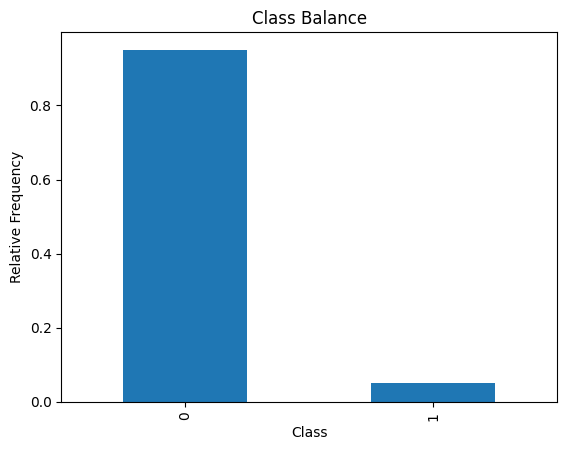

In [ ]:
df["stroke"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

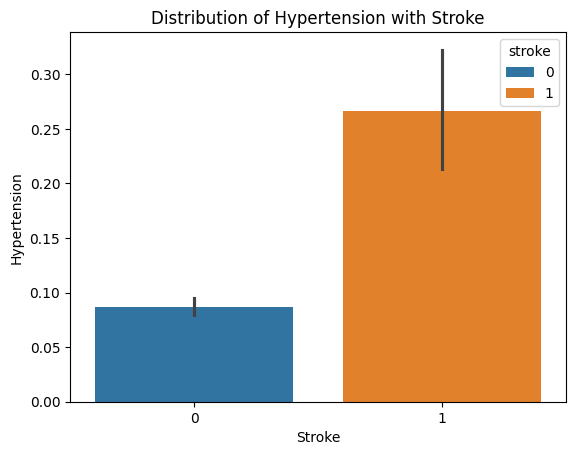

In [ ]:
sns.barplot(x="stroke", y='hypertension', data=df, hue="stroke")
#label axis
plt.xlabel("Stroke")
plt.ylabel("Hypertension")
plt.title("Distribution of Hypertension with Stroke");

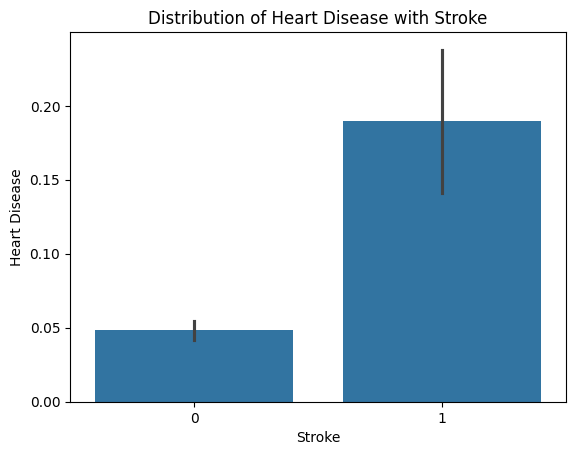

In [ ]:
sns.barplot(x="stroke", y='heart_disease', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Distribution of Heart Disease with Stroke");

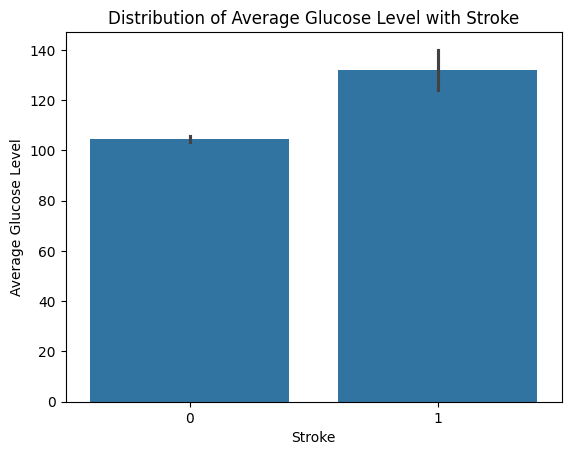

In [ ]:
sns.barplot(x="stroke", y='avg_glucose_level', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Average Glucose Level")
plt.title("Distribution of Average Glucose Level with Stroke");

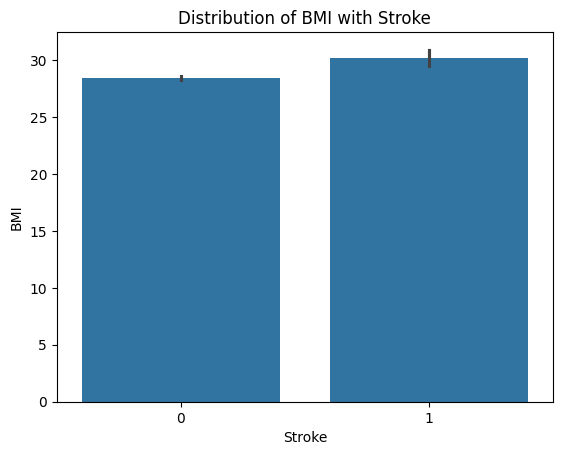

In [ ]:
sns.barplot(x="stroke", y='bmi', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("BMI")
plt.title("Distribution of BMI with Stroke");

In [ ]:
print(df["heart_disease"].value_counts())

0    4706
1     275
Name: heart_disease, dtype: int64


In [ ]:
print(df["smoking_status"].value_counts())

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


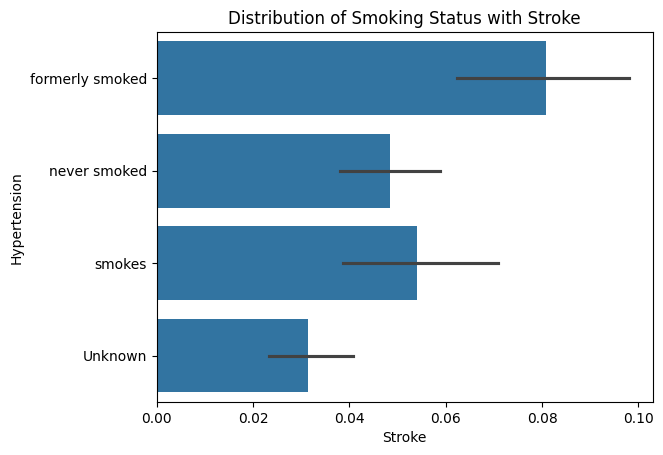

In [ ]:
sns.barplot(x="stroke", y='smoking_status', data=df)
#label axis
plt.xlabel("Stroke")
plt.ylabel("Hypertension")
plt.title("Distribution of Smoking Status with Stroke");

In [ ]:
# Exluding the object datatype in the dataset

df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   avg_glucose_level  4981 non-null   float64
 4   bmi                4981 non-null   float64
 5   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 233.6 KB


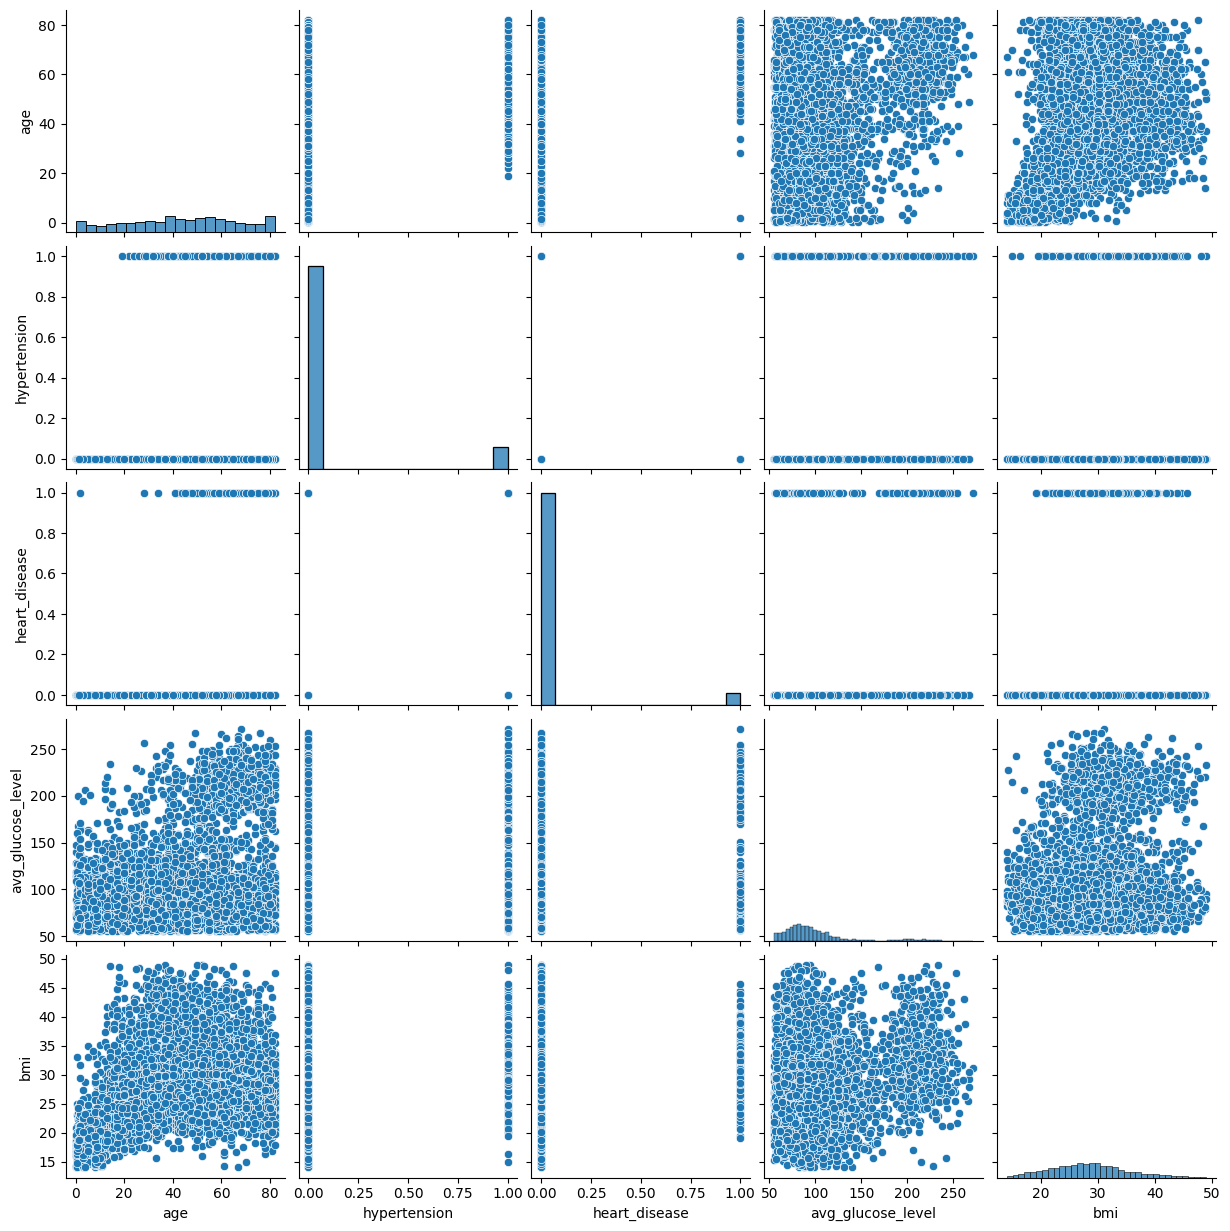

In [ ]:
y = df["stroke"].values
x_data = df.drop(["stroke"], axis = 1)
sns.pairplot(x_data)
plt.show()

# **Data Normalization**

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.816895,0.0,1.0,0.801265,0.647564
1,0.975586,0.0,1.0,0.234512,0.530086
2,0.597168,0.0,0.0,0.536008,0.584527
3,0.963379,1.0,0.0,0.549349,0.286533
4,0.987793,0.0,0.0,0.605161,0.429799


In [ ]:


# Spliting the dataset, 20% test set & 80% train set

target = "stroke"
X = df.drop(columns=target)
y = df[target]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3984, 5)
y_train shape: (3984,)
X_test shape: (997, 5)
y_test shape: (997,)


In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.95


# **Build model using Logistic Regreesion**


In [ ]:
# Build model using Logistic Regreesion
model = LogisticRegression(max_iter=1000)

# Fit model to training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicting the result
y_pred=model.predict(X_test)

In [ ]:
y_pred_decision = model.decision_function(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

In [ ]:
roc_auc_score(y_test, y_pred_decision)

0.8522053336475394

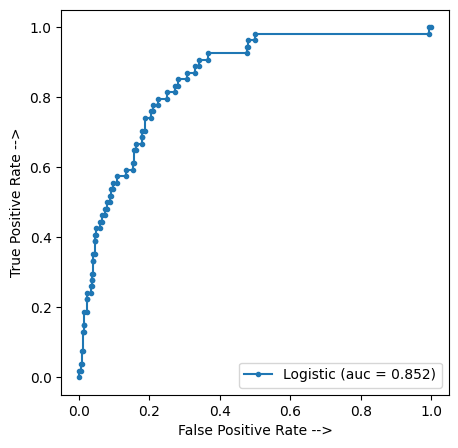

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_decision)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()



In [ ]:
model.score(X_test, y_test)

0.9458375125376128

# **Applying SMOTE technique for handling data imbalance**

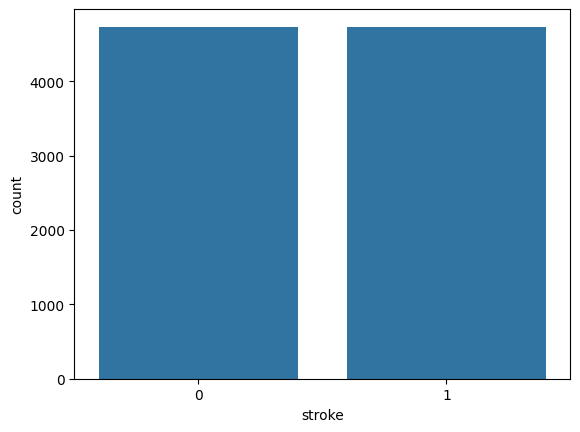

In [ ]:
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming y is a pandas Series
y = pd.Series(y)

# Apply SMOTE to X and y
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Plot the class distribution using sns.countplot
ax = sns.countplot(x=target, data=pd.DataFrame({target: y_resampled}))


## **Confusion Matrix**

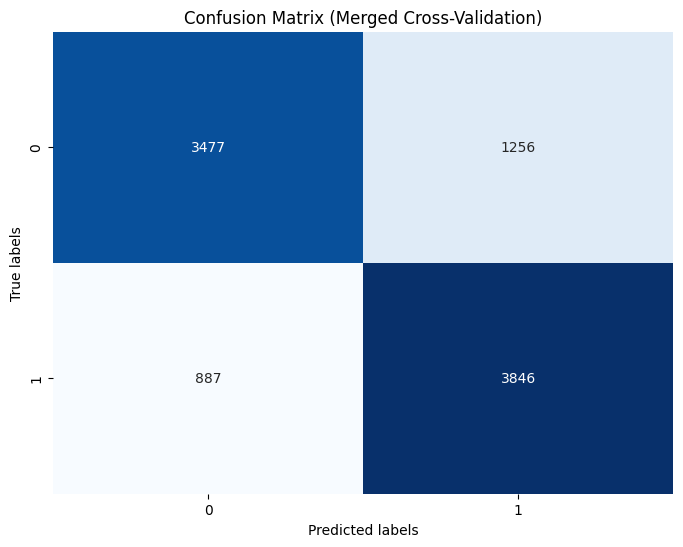

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Identify categorical columns
categorical_cols = [col for col in X_resampled.columns if X_resampled[col].dtype == 'object']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X_resampled)

# Use cross-validation to obtain predictions
y_pred_cv = cross_val_predict(logistic_regression, X_encoded, y_resampled, cv=5)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_resampled, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Merged Cross-Validation)')
plt.show()


# **Cross** **Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Identify categorical columns
categorical_cols = [col for col in X_resampled.columns if X_resampled[col].dtype == 'object']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the balanced dataset using the ColumnTransformer
X_encoded = preprocessor.fit_transform(X_resampled)

# Compute cross-validation scores
cv_scores = cross_val_score(logistic_regression, X_encoded, y_resampled, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

# Fit the logistic regression model to the entire balanced dataset
logistic_regression.fit(X_encoded, y_resampled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_resampled, logistic_regression.predict(X_encoded))
print("Training accuracy:", train_accuracy)

# Since we didn't use a validation set explicitly, validation accuracy is the same as mean CV accuracy
validation_accuracy = np.mean(cv_scores)
print("Validation accuracy:", validation_accuracy)


Cross-validation scores: [0.76821542 0.77760169 0.76597993 0.78658214 0.76967776]
Mean CV accuracy: 0.7736113877002528
Standard deviation of CV accuracy: 0.007576175624253028
Training accuracy: 0.7749841538136488
Validation accuracy: 0.7736113877002528


In [ ]:
#10 fold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Define the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Identify categorical columns
categorical_cols = [col for col in X_resampled.columns if X_resampled[col].dtype == 'object']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the balanced dataset using the ColumnTransformer
X_encoded = preprocessor.fit_transform(X_resampled)

# Compute cross-validation scores with 10-fold cross-validation
cv_scores = cross_val_score(logistic_regression, X_encoded, y_resampled, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

# Since we didn't use a validation set explicitly, validation accuracy is the same as mean CV accuracy
validation_accuracy = np.mean(cv_scores)
print("Validation accuracy:", validation_accuracy)


Cross-validation scores: [0.75501584 0.78669483 0.7750792  0.78035903 0.76135164 0.77402323
 0.77167019 0.79809725 0.77484144 0.77061311]
Mean CV accuracy: 0.7747745746554715
Standard deviation of CV accuracy: 0.011469199793697355
Validation accuracy: 0.7747745746554715


In [ ]:
from sklearn.metrics import confusion_matrix

# Fit the logistic regression model to the entire balanced dataset
logistic_regression.fit(X_encoded, y_resampled)

# Generate confusion matrix for logistic regression predictions
y_pred = logistic_regression.predict(X_encoded)
conf_matrix = confusion_matrix(y_resampled, y_pred)

# Calculate true positives, false positives, and false negatives
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Calculate accuracy
accuracy = (true_positives + conf_matrix[0, 0]) / np.sum(conf_matrix)

# Calculate precision
precision = true_positives / (true_positives + false_positives)

# Calculate recall
recall = true_positives / (true_positives + false_negatives)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7749841538136488
Precision: 0.7548462894066967
Recall: 0.8144939784491866
F1 Score: 0.7835365853658537
